In [5]:
import pandas as pd
import altair as alt

In [9]:
!head -20 data/frog_tongue_adhesion.csv

# These data are from the paper,
#   Kleinteich and Gorb, Sci. Rep., 4, 5225, 2014.
# It was featured in the New York Times.
#    http://www.nytimes.com/2014/08/25/science/a-frog-thats-a-living-breathing-pac-man.html
#
# The authors included the data in their supplemental information.
#
# Importantly, the ID refers to the identifites of the frogs they tested.
#   I:   adult, 63 mm snout-vent-length (SVL) and 63.1 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   II:  adult, 70 mm SVL and 72.7 g body weight,
#        Ceratophrys cranwelli crossed with Ceratophrys cornuta
#   III: juvenile, 28 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
#   IV:  juvenile, 31 mm SVL and 12.7 g body weight, Ceratophrys cranwelli
date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (m

In [10]:
df = pd.read_csv('data/frog_tongue_adhesion.csv', comment='#')

In [16]:
df.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa)
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975


In [19]:
#create new pd DataFrame with the metadata values from the comments section
df_frog = pd.DataFrame(index=['I', 'II', 'III', 'IV'],
                       data={'age': ['adult', 'adult', 'juvenile', 'juvenile'],
                             'SVL (mm)': [63, 70, 28, 31],
                             'weight (g)': [63.1, 72.7, 12.7, 12.7],
                             'species': ['cross', 'cross', 'cranwelli', 'cranwelli']}).reset_index()

In [20]:
df_frog

,index,age,SVL (mm),weight (g),species
0,I,adult,63,63.1,cross
1,II,adult,70,72.7,cross
2,III,juvenile,28,12.7,cranwelli
3,IV,juvenile,31,12.7,cranwelli


In [18]:
#Write out a df as a csv file
df_frog.to_csv('df_frog_out.csv')

In [44]:
#Merge the two datasets by indexing on the column I want to have in common
merged = pd.merge(left=df, right=df_frog, left_on='ID', right_on='index')

merged.head()

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa),index,age,SVL (mm),weight (g),species
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030,I,adult,63,63.1,cross
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695,I,adult,63,63.1,cross
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239,I,adult,63,63.1,cross
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381,I,adult,63,63.1,cross
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975,I,adult,63,63.1,cross


In [45]:
merged.drop('index', axis=1)

,date,ID,trial number,impact force (mN),impact time (ms),impact force / body weight,adhesive force (mN),time frog pulls on target (ms),adhesive force / body weight,adhesive impulse (N-s),total contact area (mm2),contact area without mucus (mm2),contact area with mucus / contact area without mucus,contact pressure (Pa),adhesive strength (Pa),age,SVL (mm),weight (g),species
0,2013_02_26,I,3,1205,46,1.95,-785,884,1.27,-0.290,387,70,0.82,3117,-2030,adult,63,63.1,cross
1,2013_02_26,I,4,2527,44,4.08,-983,248,1.59,-0.181,101,94,0.07,24923,-9695,adult,63,63.1,cross
2,2013_03_01,I,1,1745,34,2.82,-850,211,1.37,-0.157,83,79,0.05,21020,-10239,adult,63,63.1,cross
3,2013_03_01,I,2,1556,41,2.51,-455,1025,0.74,-0.170,330,158,0.52,4718,-1381,adult,63,63.1,cross
4,2013_03_01,I,3,493,36,0.80,-974,499,1.57,-0.423,245,216,0.12,2012,-3975,adult,63,63.1,cross
5,2013_03_01,I,4,2276,31,3.68,-592,969,0.96,-0.176,341,106,0.69,6676,-1737,adult,63,63.1,cross
6,2013_03_05,I,1,556,43,0.90,-512,835,0.83,-0.285,359,110,0.69,1550,-1427,adult,63,63.1,cross
7,2013_03_05,I,2,1928,46,3.11,-804,508,1.30,-0.285,246,178,0.28,7832,-3266,adult,63,63.1,cross
8,2013_03_05,I,3,2641,50,4.27,-690,491,1.12,-0.239,269,224,0.17,9824,-2568,adult,63,63.1,cross
9,2013_03_05,I,4,1897,41,3.06,-462,839,0.75,-0.328,266,176,0.34,7122,-1733,adult,63,63.1,cross


This worked because the column names were different (left was ID and right was index), but sometimes column names are the same and thus won't be able to distinguish between which side you're looking at

In [ ]:
#example from a different tutorial, so df names and values not appropriate for this example

#create a list of column headings
cols = list(df.columns)
#change the species column to species_id
cols[5] = 'species_id'
#assign the list of column names back to our DataFrame
surveys_df.columns = cols

print surveys_df.columns

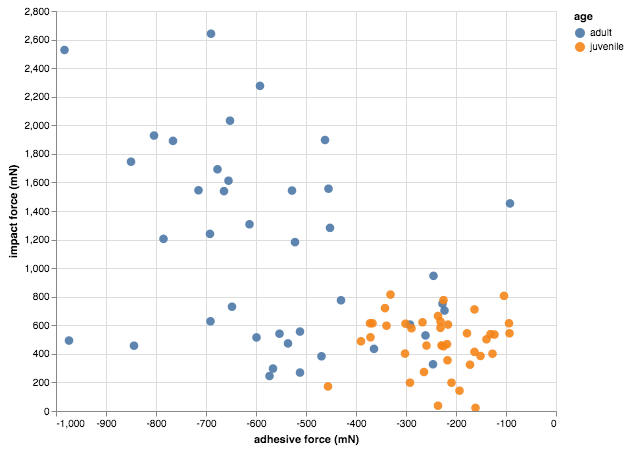

In [36]:
alt.Chart(merged,
        height=400,
        width=500
    ).mark_point(
        size=75,
        filled=True,
        opacity=0.9
    ).encode(
        x='adhesive force (mN):Q',
        y='impact force (mN):Q',
        color='age:N',
        tooltip=['ID', 'age', 'species']
    )